In [1]:
import rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

%reload_ext rpy2.ipython
%reload_ext autoreload

import json
import pandas as pd
import os
from vega import VegaLite
from ipywidgets import widgets

from falx.chart import *
from falx.interface import *

DATA_DIR = os.path.join("..", "benchmarks")

def render_ggplot2(vis):
    """Given a visualization (VisDesign object), 
        render it using ggplot"""
    
    ggplot_script = vis.to_ggplot2()
    print("\n".join(ggplot_script))
    for l in ggplot_script:
        %R -i l
        %R eval(parse(text=l))
    %R print(p)

def render_vegalite(vis):
    # Render a visualization using vegalite
    VegaLite(vis.to_vl_obj()).display()
    
def view_benchmarks(dirname):

    for fname in os.listdir(dirname):
        if not fname.endswith(".json"): continue
            
        if "003" not in fname: continue
    
        with open(os.path.join(dirname, fname), "r") as f:
            data = json.load(f)

        input_data = table_utils.load_and_clean_table(data["input_data"])
        vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
        try:
            render_vegalite(vis)
            render_ggplot2(vis)
        except:
            pass
#view_benchmarks(DATA_DIR)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[info] # Synthesizer configuration
[info] {
[info]   "solution_limit": 10,
[info]   "time_limit_sec": 30,
[info]   "search_start_depth_level": 2,
[info]   "search_stop_depth_level": 2,
[info]   "grammar_base_file": "dsl/tidyverse.tyrell.base",
[info]   "sketch_restriction": null,
[info]   "component_restriction": [
[info]     "gather",
[info]     "gatherNeg",
[info]     "spread"
[info]   ],
[info]   "vis_backend": "vegalite"
[info] }
[info] Parsing spec ...
[info] Parsing succeeded
[info] Building synthesizer ...
[info] Synthesizing programs ...


         Value      Y1      Y2      Y3      Y4      Y5
1        means  0.5200  0.5700  0.6000  0.6300  0.6300
2       stddev  0.1328  0.1321  0.1303  0.1266  0.1225
3  upper range  0.6600  0.7000  0.7300  0.7500  0.7500
4  lower range  0.3900  0.4400  0.4700  0.5000  0.5100
  c_x   c_y  c_y2
1  Y1  0.66  0.39
2  Y2  0.70  0.44
-===--===--==-=-==-
['gather', 'gatherNeg', 'spread']
None


R[write to console]: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 4 rows:
* 13, 17
* 15, 19
Do you need to create unique ID with tibble::rowid_to_column()?
Backtrace:
    █
 1. ├─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 2. │ └─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 3. ├─tidyr::spread(RET_DF143, 1, 2)
 4. └─tidyr:::spread.data.frame(RET_DF143, 1, 2)

[error] Error in interpreting spread...
R[write to console]: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 4 rows:
* 9, 13
* 11, 15
Do you need to create unique ID with tibble::rowid_to_column()?
Backtrace:
    █
 1. ├─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 2. │ └─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 3. ├─tidyr::spread(RET_DF224, 1, 3)
 4. └─tidyr:::spread.data.frame(RET_DF224, 1, 3)

[er

         Value      Y1      Y2      Y3      Y4      Y5
1        means  0.5200  0.5700  0.6000  0.6300  0.6300
2       stddev  0.1328  0.1321  0.1303  0.1266  0.1225
3  upper range  0.6600  0.7000  0.7300  0.7500  0.7500
4  lower range  0.3900  0.4400  0.4700  0.5000  0.5100
  c_x   c_y
1  Y1  0.52
2  Y2  0.57
3  Y3  0.60
-===--===--==-=-==-
['gather', 'gatherNeg', 'spread']
None


R[write to console]: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 4 rows:
* 9, 13
* 11, 15
Do you need to create unique ID with tibble::rowid_to_column()?
Backtrace:
    █
 1. ├─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 2. │ └─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 3. ├─tidyr::spread(RET_DF103, 1, 3)
 4. └─tidyr:::spread.data.frame(RET_DF103, 1, 3)

[error] Error in interpreting spread...
R[write to console]: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 4 rows:
* 5, 9
* 7, 11
Do you need to create unique ID with tibble::rowid_to_column()?
Backtrace:
    █
 1. ├─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 2. │ └─(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ...
 3. ├─tidyr::spread(RET_DF368, 1, 4)
 4. └─tidyr:::spread.data.frame(RET_DF368, 1, 4)

[error

# candidates before getting the correct solution: 10
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'means'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]
[{'c_x': 'KEY', 'c_y': 'upper range', 'c_y2': 'lower range'}, {'c_x': 'KEY', 'c_y': 'VALUE'}]


[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gatherNeg(@param0, ['-1', '-5', '-6']),
  spread(gatherNeg(@param0, ['-1', '-5', '-6']), 1, 3)]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gatherNeg(@param0, ['-1', '-5', '-6']),
  spread(gatherNeg(@param0, ['-1', '-5', '-6']), 1, 2)]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gatherNeg(@param0, ['-1', '-5']),
  spread(gatherNeg(@param0, ['-1', '-5']), 1, 2)]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gather(@param0, ['2', '3', '4']),
  spread(gather(@param0, ['2', '3', '4']), 1, 2)]]

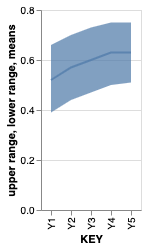

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gatherNeg(@param0, ['-1', '-6']),
  spread(gatherNeg(@param0, ['-1', '-6']), 1, 2)]]

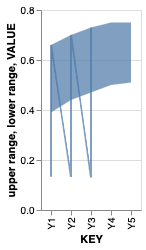

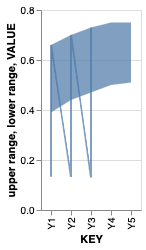

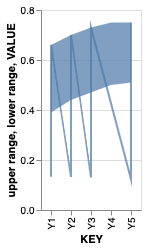

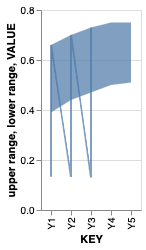

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [gather(@param0, ['2', '3', '4']),
  spread(gather(@param0, ['2', '3', '4']), 1, 3)]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [spread(@param0, 1, 5), gatherNeg(spread(@param0, 1, 5), ['-5', '-6'])]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [spread(@param0, 1, 5), gatherNeg(spread(@param0, 1, 5), ['-4', '-5'])]]

[[gatherNeg(@param0, ['-1']), spread(gatherNeg(@param0, ['-1']), 1, 3)],
 [spread(@param0, 1, 6), gatherNeg(spread(@param0, 1, 6), ['-4', '-5'])]]

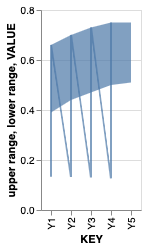

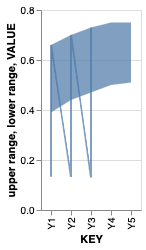

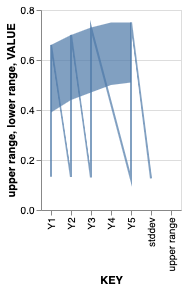

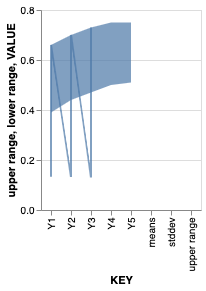

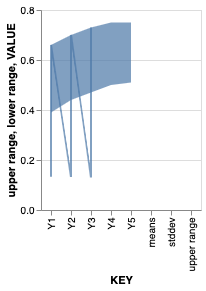

In [2]:
inputs = [[
  {"Value":"means","Y1":0.52,"Y2":0.57,"Y3":0.6,"Y4":0.63,"Y5":0.63},
  {"Value":"stddev","Y1":0.1328,"Y2":0.1321,"Y3":0.1303,"Y4":0.1266,"Y5":0.1225},
  {"Value":"upper range","Y1":0.66,"Y2":0.7,"Y3":0.73,"Y4":0.75,"Y5":0.75},
  {"Value":"lower range","Y1":0.39,"Y2":0.44,"Y3":0.47,"Y4":0.5,"Y5":0.51}
]]

vtrace = [
  {"type": "area", 
   "props": {"x_left": "Y1", "y_top_left": 0.66, "y_bot_left": 0.39,  
             "x_right": "Y2", "y_top_right": 0.7, "y_bot_right": 0.44}},
  {"type": "line", "props": {"x1": "Y1", "y1": 0.52, "x2": "Y2", "y2": 0.57}},
  {"type": "line", "props": {"x1": "Y2", "y1": 0.57, "x2": "Y3", "y2": 0.6}}
]

candidates = FalxInterface.synthesize(inputs=inputs, 
                                      raw_trace=vtrace,
                                      config={"search_start_depth_level": 2, 
                                              "search_stop_depth_level": 2,
                                              "component_restriction": ["gather", "gatherNeg", "spread"]})

for table_prog, vis_design in candidates:
    display(table_prog)
    render_vegalite(vis_design)